In [1]:
import sys
import os

sys.path.append(os.path.join('..', '..', '..'))

In [4]:
from roboflow import Roboflow
from config import ROBOFLOW_API_KEY

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("mihailo").project("football-field-detection-f07vi-apxzb")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dependency ultralytics==8.0.196 is required but found version=8.3.4, to fix: `pip install ultralytics==8.0.196`


In [11]:
import os
import yaml

YAML_PATH = os.path.join(dataset.location,"data.yaml")

with open(YAML_PATH) as f:
     list_doc = yaml.safe_load(f)

list_doc['test'] = '../test/images'
list_doc['train'] = '../train/images'
list_doc['val'] = '../valid/images'

print(list_doc)

with open(YAML_PATH, "w") as f:
    yaml.dump(list_doc, f)

{'flip_idx': [24, 25, 26, 27, 28, 29, 22, 23, 21, 17, 18, 19, 20, 13, 14, 15, 16, 9, 10, 11, 12, 8, 6, 7, 0, 1, 2, 3, 4, 5, 31, 30], 'kpt_shape': [32, 3], 'names': ['pitch'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'football-field-detection-f07vi-apxzb', 'url': 'https://universe.roboflow.com/mihailo/football-field-detection-f07vi-apxzb/dataset/1', 'version': 1, 'workspace': 'mihailo'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [ ]:
!yolo task=pose mode=train model=yolo11n-pose.pt data={YAML_PATH} batch=32 epochs=500 patience=40 imgsz=640 mosaic=0.0 plots=True cache=False

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=/gdrive/MyDrive/yolo_keypoints_train/football-field-detection-1/data.yaml, epochs=500, time=None, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [ ]:
!yolo mode=train resume model=runs/pose/train6/weights/last.pt task=pose data={YAML_PATH} batch=32 epochs=500 patience=40 imgsz=640 mosaic=0.0 plots=True cache=False

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=runs/pose/train6/weights/last.pt, data=/gdrive/MyDrive/yolo_keypoints_train/football-field-detection-1/data.yaml, epochs=500, time=None, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/pose/train6/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

In [2]:
RESULTS_DIR = 'runs/pose/train6'

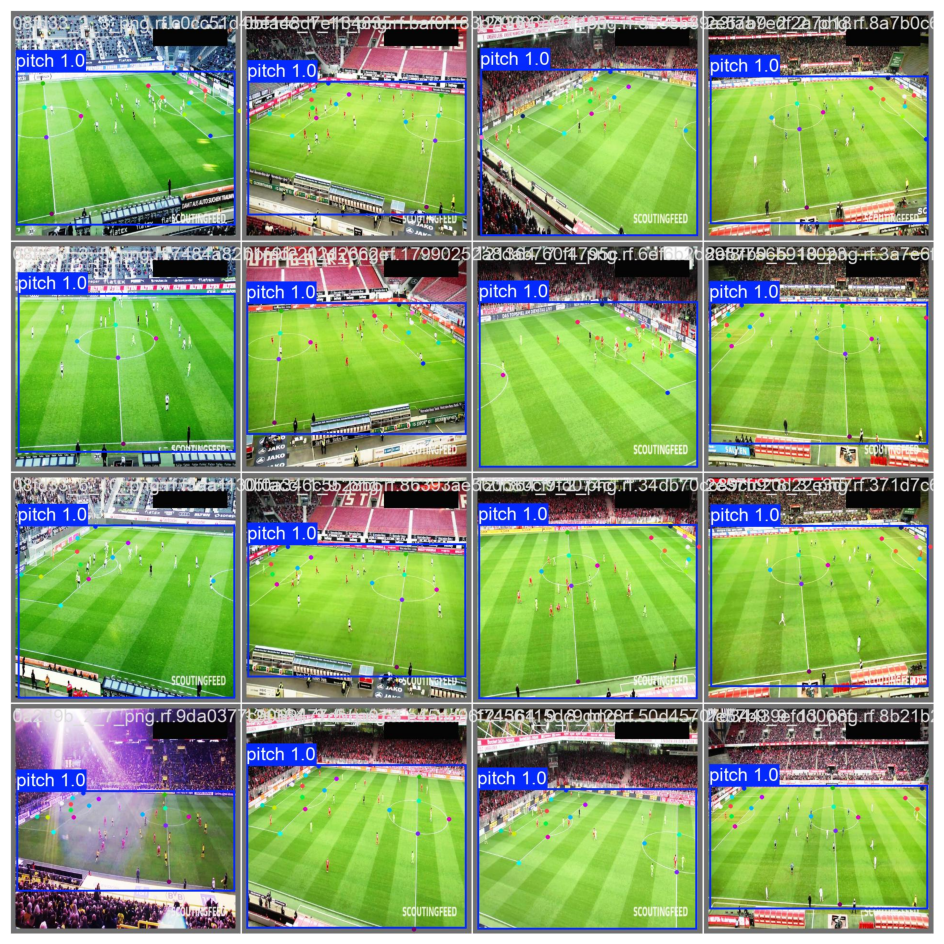

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
plt.axis(False)
plt.imshow(mpimg.imread(f'{RESULTS_DIR}/val_batch0_pred.jpg'))

plt.show()

In [12]:
!yolo task=pose mode=val model={RESULTS_DIR}/weights/best.pt data={YAML_PATH}

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-pose summary (fused): 257 layers, 3,246,763 parameters, 0 gradients, 9.1 GFLOPs
100% 755k/755k [00:00<00:00, 93.9MB/s]
val: Scanning /gdrive/MyDrive/yolo_keypoints_train/football-field-detection-1/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 3/3 [00:26<00:00,  8.75s/it]
                   all         34         34          1          1      0.995      0.995          1          1      0.995      0.994
Speed: 3.9ms preprocess, 21.0ms inference, 0.0ms loss, 35.2ms postprocess per image
Results saved to runs/pose/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [3]:
import os
import shutil

source_path = f'{RESULTS_DIR}/weights/best.pt'
destination_dir = '../../weights'
destination_file = os.path.join(destination_dir, 'keypoints-detection.pt')

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move and rename the file
try:
    shutil.move(source_path, destination_file)
    print(f"File moved and renamed to {destination_file}")
except FileNotFoundError:
    print(f"Source file '{source_path}' not found.")
except Exception as e:
    print(f"Error occurred: {e}")

File moved and renamed to ../../weights\keypoints-detection.pt
